<a href="https://colab.research.google.com/github/rcarvajal208/MachineLearning_Retos/blob/master/Reto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Se importan las librerias a utilizar y el archivo que contiene los datos a evaluar


In [1]:
from sklearn import preprocessing, model_selection
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import random
files.upload()

{}

Se descargan los datos suministrados

In [2]:
musica = pd.DataFrame(pd.read_excel('Reto1_Revisado_Musica.xlsx')).drop(['genre','track_id','title','artist_name'],axis=1)
print(musica.describe())

              type    loudness  ...  var_timbre11  var_timbre12
count  8350.000000  8350.00000  ...   8350.000000   8350.000000
mean      0.519042   -12.71443  ...    350.331967    372.121087
std       0.499667     5.80163  ...    170.406693    181.784508
min       0.000000   -41.03800  ...     49.275323     34.917502
25%       0.000000   -15.90100  ...    230.339339    267.177197
50%       1.000000   -11.70950  ...    317.891281    334.593569
75%       1.000000    -8.39900  ...    435.597608    426.006784
max       1.000000    -0.27800  ...   2049.996543   2417.601217

[8 rows x 31 columns]


A continuación se hace el preprocesamiento de los datos. Para lo cual normalizamos los datos

In [0]:
x_multiple = preprocessing.normalize(np.array(musica.drop('type',1)))
y_multiple = np.array(musica['type'])
porcentajePrueba1 = 0.8
porcentajePrueba2 = 0.5
porcentajePrueba3 = 0.2
porcentajePrueba4 = 0.1
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = model_selection.train_test_split(x_multiple,y_multiple,test_size=1-porcentajePrueba1)
x_entrenamiento2, x_sobrante2, y_entrenamiento2, y_sobrante2 = model_selection.train_test_split(x_entrenamiento,y_entrenamiento,test_size=1-porcentajePrueba2)
x_entrenamiento3, x_sobrante3, y_entrenamiento3, y_sobrante3 = model_selection.train_test_split(x_entrenamiento,y_entrenamiento,test_size=1-porcentajePrueba3)
x_entrenamiento4, x_sobrante4, y_entrenamiento4, y_sobrante4 = model_selection.train_test_split(x_entrenamiento,y_entrenamiento,test_size=1-porcentajePrueba4)

1.   Se crea el algoritmo de entrenamiento a partir de error cruzado
2.   En la función siguiente se presenta el algoritmo de desenso de gradiente estocastico, utilizando mini bash de un dato.
3.   en este algoritmo se establece que el criterio de parada esta dado por completar el número de iteraciones dado o tener un errror menor a la tolerancia dada.
4.   Igualmente la función es capaz de generar la grafica de como se comporta el error cuadratico a lo largo de cada ciclo de iteración






In [0]:
def entrenarRegreLogistica(x,y,a,iterar,tol, titulo):
  nDatos, nColumnas = x.shape
  w1 = np.zeros(nColumnas)
  w = np.ones(nColumnas)*0.1
  error = 1000
  errorCuadratico = 0
  n = 1
  #while (n<iterar and np.all(w==w1)):
  while (n<iterar):
    i = random.randrange(0,nDatos)
    xi = x[i]
    yi = y[i]
    g = 1/(1+math.exp(sum(w*xi)*-1))
    error = (yi-g)
    w1 = w
    w = w1 - (a*error*xi)
    errorCuadratico = np.append(errorCuadratico,error*error/2)
    n += 1
  xplot = np.arange(0,n) 
  plt.plot(xplot,errorCuadratico)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(titulo)
  plt.show()
  return w 

Se crea una función que recibe los coeficientes w de la regresión logistica, para a partir de estos calcular la predicción de 'y' para el vector x

In [0]:
def RegreLogistica(w, x):
  y = 0
  nDatos, nColumnas = x.shape
  n = 0
  while(n<nDatos):
    xi = x[n]
    g = 1/(1+math.exp(sum(w*xi)*-1))
    y = np.append(y,g)
    n += 1
  return y

Se crean los vectores de entrenamiento que contiene el 100% datos de entrenamiento y se usan para entrenar la regresión lineal. A continuación esta es evaluada con el vector de prueba

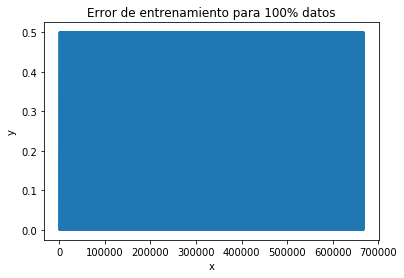

In [39]:
w = entrenarRegreLogistica(x_entrenamiento,y_entrenamiento,0.1,len(y_entrenamiento)*100,1e-5,'Error de entrenamiento para 100% datos') 
y_regresion1 = RegreLogistica(w,x_prueba)

Se crean los vectores de entrenamiento que contiene el 50% datos de entrenamiento y se usan para entrenar la regresión lineal. A continuación esta es evaluada con el vector de prueba

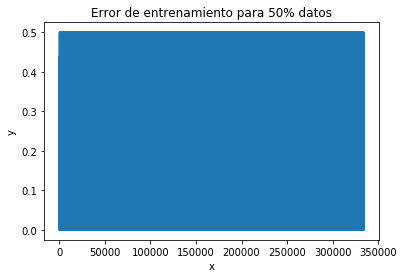

In [40]:
w = entrenarRegreLogistica(x_entrenamiento2,y_entrenamiento2,0.1,len(y_entrenamiento2)*100,1e-5,'Error de entrenamiento para 50% datos') 
y_regresion2 = RegreLogistica(w,x_prueba)

Se crean los vectores de entrenamiento que contiene el 20% datos de entrenamiento y se usan para entrenar la regresión lineal. A continuación esta es evaluada con el vector de prueba

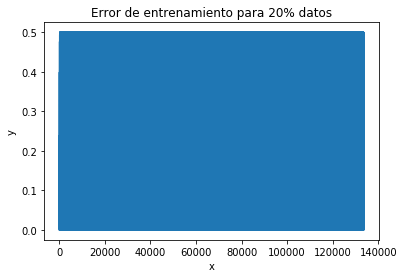

In [41]:
w = entrenarRegreLogistica(x_entrenamiento3,y_entrenamiento3,0.1,len(y_entrenamiento3)*100,1e-5,'Error de entrenamiento para 20% datos') 
y_regresion3 = RegreLogistica(w,x_prueba)

Se crean los vectores de entrenamiento que contiene el 10% datos de entrenamiento y se usan para entrenar la regresión lineal. A continuación esta es evaluada con el vector de prueba

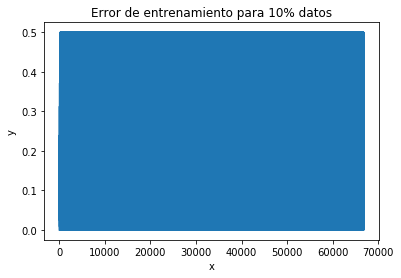

In [42]:
w = entrenarRegreLogistica(x_entrenamiento4,y_entrenamiento4,0.1,len(y_entrenamiento4)*100,1e-5,'Error de entrenamiento para 10% datos') 
y_regresion4 = RegreLogistica(w,x_prueba)

Finalmente se evalua el error empirico de cada uno de los tres conjuntos de datos utilizados

In [43]:
errores1 = 0
errores2 = 0
errores3 = 0
errores4 = 0
i = 0
for n in y_prueba:
  if(abs(n-y_regresion1[i])!=0):
    errores1 = errores1+1
  if(abs(n-y_regresion2[i])!=0):
    errores2 = errores2+1
  if(abs(n-y_regresion3[i])!=0):
    errores3 = errores3+1
  if(abs(n-y_regresion4[i])!=0):
    errores4 = errores4+1
  i = i+1
print("Error empirico para 100% datos de entrenamiento: "+str(errores1/i))
print("Error empirico para 50% datos de entrenamiento: "+str(errores2/i))
print("Error empirico para 20% datos de entrenamiento: "+str(errores3/i))
print("Error empirico para 10% datos de entrenamiento: "+str(errores4/i))

Error empirico para 100% datos de entrenamiento: 0.47724550898203594
Error empirico para 50% datos de entrenamiento: 0.47724550898203594
Error empirico para 20% datos de entrenamiento: 0.47724550898203594
Error empirico para 10% datos de entrenamiento: 0.47724550898203594


Por utlimo, se puede observar que el error empirico en efecto aumenta a medida que disminuimos el tamaño del conjunto de datos de entrenamiento.

Ahora bien, respecto al error de entrenamiento no se pudo observar ningun cambio relevante, ya que en sí la señal es muy ruidosa